In [1]:
import sys
print(sys.executable)

E:\anaconda3\envs\tensorflow21gpu\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output
%matplotlib inline

import tensorflow as tf
# import tensorflow_addons as tfa

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))
print(tf.config.list_physical_devices('GPU'))

tensorflow version: 2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU 사용 가능 여부: True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
train_pandas = pd.read_csv("train_job/train.csv")
train_usertags_pandas = pd.read_csv("train_job/user_tags.csv")
train_jobtags_pandas = pd.read_csv("train_job/job_tags.csv")
train_jobcompanies_pandas = pd.read_csv("train_job/job_companies.csv")

In [4]:
train_pandas.head()

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


In [5]:
train_usertags_pandas.head()

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a


In [6]:
train_jobtags_pandas.head()

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
3,e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d
4,e820a45f1dfc7b95282d10b6087e11c0,6c8dba7d0df1c4a79dd07646be9a26c8


In [7]:
for col in train_usertags_pandas.columns:
    print(col)

userID
tagID


In [8]:
print(len(train_usertags_pandas.values))

17194


In [9]:
from collections import defaultdict
usertagdict = defaultdict(list)
for u, t in train_usertags_pandas.values:
    usertagdict[u].append(t)
jobtagdict = defaultdict(list)
for j, t in train_jobtags_pandas.values:
    jobtagdict[j].append(t)

In [10]:
print(len(usertagdict['e576423831e043f7928d9ac113abbe6f']))
print(len(jobtagdict['320722549d1751cf3f247855f937b982']))

112
2


In [11]:
avg_usertag = sum(list(map(len,usertagdict.values()))) // len(usertagdict)
avg_jobtag = sum(list(map(len,jobtagdict.values()))) // len(jobtagdict)
print(avg_usertag, avg_jobtag)

87 4


In [12]:
train = train_pandas[:]

In [13]:
train['usertagnum'] = avg_usertag
train['jobtagnum'] = avg_jobtag
train['uniontagnum'] = 0

In [14]:
train.head()

,userID,jobID,applied,usertagnum,jobtagnum,uniontagnum
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,87,4,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,87,4,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,87,4,0
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,87,4,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,87,4,0


In [15]:
for i,(u,j) in enumerate(train[['userID','jobID']].values):
    train.loc[i,'usertagnum'] = len(usertagdict[u])
    train.loc[i,'jobtagnum'] = len(jobtagdict[j])
    train.loc[i,'uniontagnum'] = len(set(usertagdict[u]) & set(jobtagdict[j]))

In [16]:
train.to_csv('temp1.csv')

In [17]:
train_jobcompanies_pandas.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [18]:
set(train_jobcompanies_pandas['companySize'].values)

{'1-10', '1000 이상', '101-200', '11-50', '201-500', '501-1000', '51-100', nan}

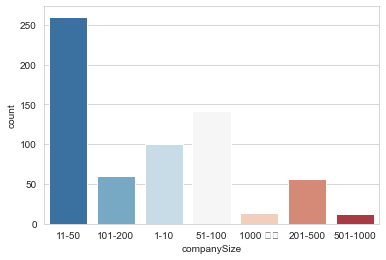

In [19]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='companySize',data=train_jobcompanies_pandas,palette='RdBu_r')

In [20]:
train_jobcompanies = train_jobcompanies_pandas[:]
train_jobcompanies['companySize'] = train_jobcompanies['companySize'].fillna('11-50')

In [21]:
companysizedict = {'1-10':1,'11-50':2,'51-100':3,'101-200':4,'201-500':5,'501-1000':6,'1000 이상':7}

In [22]:
jobsizedict = defaultdict(int)
for j,s in train_jobcompanies[['jobID','companySize']].values:
    jobsizedict[j] = companysizedict[s]

In [23]:
train['companySize'] = 1
for i,(j) in enumerate(train['jobID'].values):
    train.loc[i,'companySize'] = jobsizedict[j]
train.head()

,userID,jobID,applied,usertagnum,jobtagnum,uniontagnum,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,151,2,0,2
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,125,3,1,4
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,28,3,1,2
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,85,5,3,2
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,100,4,1,3


In [24]:
train.to_csv('temp2.csv')

In [25]:
train_set = train[['usertagnum','jobtagnum','uniontagnum','companySize']]
predict_label = tf.cast(tf.one_hot(train['applied'],2), tf.int64)

In [26]:
predict_label

<tf.Tensor: shape=(6000, 2), dtype=int64, numpy=
array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int64)>

In [27]:
print(np.array(train_set), np.array(predict_label))

[[151   2   0   2]
 [125   3   1   4]
 [ 28   3   1   2]
 ...
 [122  12   2   4]
 [ 35   4   1   3]
 [126   4   1   5]] [[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [28]:
seed = 7
np.random.seed(seed)

# Model
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(10, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(10, input_dim=4))
model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Dense(2, kernel_initializer='normal',activation=tf.nn.softmax))
model.add(tf.keras.layers.Dense(2))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_fit = model.fit(np.array(train_set), np.array(predict_label), epochs=5, batch_size=5, verbose=1,validation_split=0.1)

Train on 5400 samples, validate on 600 samples
Epoch 1/5
5400/5400 [==============================] - 3s 565us/sample - loss: 0.4619 - accuracy: 0.8502 - val_loss: 0.4351 - val_accuracy: 0.8450
Epoch 2/5
5400/5400 [==============================] - 2s 450us/sample - loss: 0.4624 - accuracy: 0.8535 - val_loss: 0.4704 - val_accuracy: 0.8450
Epoch 3/5
5400/5400 [==============================] - 2s 440us/sample - loss: 0.4264 - accuracy: 0.8556 - val_loss: 0.4342 - val_accuracy: 0.8433
Epoch 4/5
5400/5400 [==============================] - 3s 464us/sample - loss: 0.4093 - accuracy: 0.8587 - val_loss: 0.4339 - val_accuracy: 0.8433
Epoch 5/5
5400/5400 [==============================] - 2s 428us/sample - loss: 0.4088 - accuracy: 0.8587 - val_loss: 0.4401 - val_accuracy: 0.8433


In [29]:
model.evaluate(np.array(train_set), np.array(predict_label))

6000/6000 [==============================] - 0s 64us/sample - loss: 0.4118 - accuracy: 0.8572


[0.4118256155649821, 0.85716665]

In [30]:
test_pandas = pd.read_csv("test_job.csv")

In [31]:
test_pandas.head()

,userID,jobID
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4


In [32]:
test = test_pandas[:]

test['usertagnum'] = avg_usertag
test['jobtagnum'] = avg_jobtag
test['uniontagnum'] = 0
test['companySize'] = 1
for i,(u,j) in enumerate(test[['userID','jobID']].values):
    test.loc[i,'usertagnum'] = len(usertagdict[u])
    test.loc[i,'jobtagnum'] = len(jobtagdict[j])
    test.loc[i,'uniontagnum'] = len(set(usertagdict[u]) & set(jobtagdict[j]))
    test.loc[i,'companySize'] = jobsizedict[j]

test

,userID,jobID,usertagnum,jobtagnum,uniontagnum,companySize
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,143,7,3,2
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,48,7,1,3
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,78,7,1,2
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,15,4,0,2
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,100,6,0,2
...,...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,82,4,0,5
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,30,3,2,2
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,170,4,2,2
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,30,3,1,2


In [33]:
test_set = test[['usertagnum','jobtagnum','uniontagnum','companySize']].astype(int)

In [34]:
y_predict = model(np.array(test_set))

In [35]:
print(y_predict)

tf.Tensor(
[[197.34627   27.489704]
 [ 68.05952    9.022432]
 [107.202805  14.534527]
 ...
 [235.22874   32.530148]
 [ 44.068726   5.879547]
 [112.41532   14.87307 ]], shape=(2435, 2), dtype=float32)


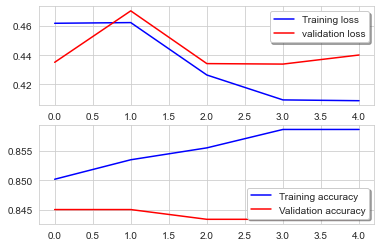

In [36]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_fit.history['loss'], color='b', label="Training loss")
ax[0].plot(history_fit.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_fit.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_fit.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [37]:
val_label_num = np.argmax(y_predict, axis=1).reshape(-1,1)

In [38]:
val_label_num

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [39]:
result = pd.DataFrame(val_label_num,columns=['applied'])
result

,applied
0,0
1,0
2,0
3,0
4,0
...,...
2430,0
2431,0
2432,0
2433,0


In [40]:
import datetime
now = datetime.datetime.now()
result.to_csv('output_{}.csv'.format(now.strftime('%y_%m_%d_%H_%M_%S')), index=False)